# Logistic Regression - Glass Type Classification

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from numpy import array
from numpy import argmax

## Data Set summary

To get familiar with the data set and the objective of the classification here
please see below the full Data Summary file published:
https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.names

**Glass Types**
As per glass type and glass distribution report we have the following:

**Type of glass: (class attribute)**
- 1 building_windows_float_processed
- 2 building_windows_non_float_processed
- 3 vehicle_windows_float_processed
- 4 vehicle_windows_non_float_processed (none in this database)
- 5 containers
- 6 tableware
- 7 headlamps

**Class Distribution: (out of 214 total instances)**
- **163 Window glass** (building windows and vehicle windows)
  - 87 float processed  
    - 70 building windows
    - 17 vehicle windows
  - 76 non-float processed
    - 76 building windows
    - 0 vehicle windows
- **51 Non-window glass**
   - 13 containers
   - 9 tableware
   - 29 headlamps



### Classification objective (s)
Based on the categories above, we can classify/predict either of the following
- Predict A: **Window vs Non-window** glass OR
- Predict B: **float vs non-float** processed window


## Load the Glass Data Set

In [2]:
# For more background on the Glass Data set, have a look at the information link;
# https://archive.ics.uci.edu/ml/datasets/glass+identification
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['ri','na','mg','al','si','k','ca','ba','fe','glass_type']
df = pd.read_csv(url, names=col_names)
df.head()
df.tail()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


### Predict A - turn glass type into Feature

In [3]:
# glass_type 1, 2, 3 are window glass
# glass_type 5, 6, 7 are non-window glass
df['Window'] = df.glass_type.map({1:1, 2:1, 3:1, 4:1, 5:0, 6:0, 7:0})
df.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,Window
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1


### Predict B - turn glass type into Feature

In [4]:
# glass_type 1, 2, 3 are window glass
# glass_type 5, 6, 7 are non-window glass
df['Float'] = df.glass_type.map({1:1, 2:0, 3:1, 4:0, 5:2, 6:2, 7:2})
df.tail()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,Window,Float
210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7,0,2
211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7,0,2
212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7,0,2
213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7,0,2
214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7,0,2


In [5]:
X = df[['al']]
X = np.arange(len(X),)
np.shape(X)

(214,)

In [6]:
y = df[['Window']].values
y = np.reshape(y, (-1,))
#y.values
np.shape(y)

(214,)

In [7]:
len(df[['al']])

#df.Window.shape()

214

In [8]:
len(df[['Window']])

214

# Define Parameters

In [9]:
# Learning Rate
eta = 3

# Number of epochs for learning
epochs = 1000

# Input layer
inputLayer = len(df[['al']])

# Output Layer
outputLayer = 1

# Number of Hidden Neurons
#hidden = 0

# Drop out rate probability (drp = 1 means no dropout)
#drp = 1

# Define Functions

In [10]:
class Neural_Network(object):
    def __init__(self, eta, inputL, outputL):

        # Define NN structure parameters
        self.inputLayer = inputL
        #self.hidden = hiddenL
        self.outputLayer = outputL
        self.eta = eta
        #self.drp = drp

        # Initialise random weights based on NN structure
        #self.w01 = np.random.random((self.inputLayer, self.hidden))
        t = np.random.random((self.inputLayer, self.outputLayer))
        self.w = np.reshape(t, (-1,))
        #print('w dimension',np.shape(self.w))
        #a.reshape((3,1))
        

        # Initialise Weights Learning lists to keep track of weights learning curve
        #self.w01_list = []
        self.w_list = []
        #self.w01_curve = []
        self.w_curve = []

        # Initialise Error list to keep track of Error learning curve
        self.E = []
        
        #error_total=[]
        #self.E_o_type0=[]
        #self.E_o_type1=[]
        #self.E_o_type2=[]

    def feedforward(self,X):
        # ****************************************************************************
        # Feedforward FUNCTION
        # 
        # Purpose of this function is to calculate the NN output based on the Input X,
        # the given Weights per layer and the activation function for each neuron. The
        # function is designed to cater for Dropout feature, which scales the weights
        # of the NN during Testing, by probability p, which is a parametrised using 
        # input variable k. Typical default dropout value is 0.5. For k=1 there is no 
        # dropout
        # 
        # Paramenters
        # X     :Input vector
        # mode  :Select "0" for Training Mode or Select "1" for Testing Mode
        # k     :Optional input for the Dropout Hyperparameter, when applicable. If not
        #        specified, it is defaulted to NN configuration

        # When training (mode="0") Drop out applies for the hidden layer outputs a_h
        #print('self.w',len(self.w))
        self.z = np.dot(X, self.w)
        a = self.sigmoid(self.z)
            
        return(a)


    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))


    def backprop(self,X,y,a):
        # Backpropagation for Single Perceptron
        self.delta_E = a - y
        self.delta_a = self.sigmoid(a,derivative=True)
        self.delta_z = X
        self.delta_E_w = np.dot(self.delta_z.T,(self.delta_E * self.delta_a))

        
        # Store All weights throughout learning
        self.w_list.append(self.w)
        #self.w12_list.append(self.w12)

        # Adjust weights
        self.w = self.w - eta * self.delta_E_w
        #self.w12 = self.w12 - eta * self.delta_E_w12

        
    def saveWeights(self):
        np.savetxt("w.txt", self.w, fmt="%s")
        #np.savetxt("w2.txt", self.w12, fmt="%s")
        # print("Input-Hidden Layer weights:\n",self.w01)
        # print("\nHidden-Output Layer weights:\n",self.w12)

    '''def weightsCurve(self):
        for i in range(self.w01.shape[0]):
            for j in range(self.w01.shape[1]):
                for x in range(len(self.w01_list)):
                    self.w01_curve.append(self.w01_list[x][i][j])
                    #print("Weights w[",x,"],[",i,"],[",j,"] stored")
                    #print(w01_list[x][i][j])
'''
    def error(self,a, y):
        a_error = ((1 / 2) * (np.power((a - y), 2)))
        #print('a:',a)
        #print('y:',y)
        #print('a_error:',a_error)
        #a_error = np.reshape(a_error, (-1,))
        return a_error
    
    def errorCurve(self, error):
        #print('E:', self.E)
        type(self.E)
        #print('sum error:',sum(error))
        self.E = np.append(self.E, sum(error))
        return self.E
        
    def train(self,X,y):
        # Forward pass
        # Second argument: "0" for training, "1" for prediction
        a = self.feedforward(X)
        self.backprop(X,y,a)

    def plot(self, E):
        fig = plt.figure()
        plt.plot(E)
        
        fig.suptitle('Error', fontsize=16)
        plt.xlabel('Epochs', fontsize=12)
        plt.ylabel('Error achieved', fontsize=12)
        
        # Save graphs
        fig.savefig('Error.jpg')
      
        plt.show()

    def predict(self, X):
        # Forward pass
        # Second argument: "0" for training, "1" for prediction
        a = self.feedforward(X)
        
        print("Minimum Error achieved:", min(self.E)) 
        print("Epochs run:", epochs)
        #print("Hidden neurons",self.hidden)
        print("Learning Rate:",self.eta)
        #np.savetxt("Predicted_Output.csv", a_o, delimiter=",")
        #print("\nPredicted Output based on trained weights:")
        #print(a_o)
        #print("\n")
        
    '''def plotWeights(self, epochs):
        fig = plt.figure()
        numberOfWeights = self.w01.shape[1]*self.w01.shape[0]
        for k in range(numberOfWeights):
            t= self.w01_curve[(epochs*k):(epochs*(k+1)-1)]
            plt.plot(t)
        if self.drp == 1:
            fig.suptitle('W01 Weights learning', fontsize=16)
        elif self.drp == 0.5:
            fig.suptitle('W01 Weights learning WITH dropout', fontsize=16)
        plt.xlabel('Epochs', fontsize=12)
        plt.ylabel('W01', fontsize=12)
        #fig.savefig('W01_curve.jpg')
        '''

# Start feeding forward and backpropagate *epochs* times.

In [11]:

# Initiating 2 NNs with the following function and input parameters
# Neural_Network(eta, inputL, hiddenL, outputL, drp)
# For initialization, can use direct values or the configuration parameters

# Neural Network without Dropout
NN1 = Neural_Network(eta, inputLayer, outputLayer)


for epoch in range(epochs):
    # Forward pass
    a = NN1.feedforward(X)
    
    # Calculate the error and sub-type errors for NN1
    a_error = NN1.error(a, y)
    print('a_error:',a_error)
    
    # Create vector with error and expected output
    a_err_y = np.concatenate((a_error,y), axis=0)
    
    
    # Build NN1 error curve while learning
    E = NN1.errorCurve(a_error)    
    
    # Train Neural Networks and construct weights learning curve as it learns
    NN1.train(X, y)
   

a_error: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
a_error: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

a_error: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
a_error: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
a_error: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
a_error: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 

a_error: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
a_error: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

a_error: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
a_error: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

a_error: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
a_error: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
a_error: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
a_error: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 

a_error: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
a_error: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

a_error: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
a_error: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

a_error: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
a_error: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

## NN - Predict and Plot

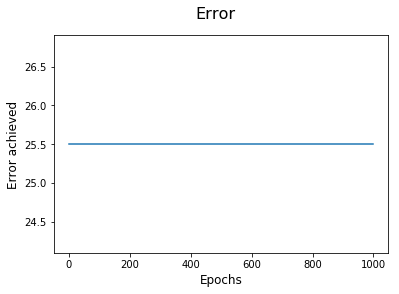

Minimum Error achieved: 25.5
Epochs run: 1000
Learning Rate: 3


In [12]:
# Neural Network without Dropout
NN1.plot(E)
NN1.predict(X)

# Build Weights curve using wxx_list and plot weights
#NN1.weightsCurve()
#NN1.plotWeights(epochs)


# Show final total error, type contribution to error

In [13]:
print("Total error:",sum(a_error))


Total error: 25.5


# Plot NN1 error

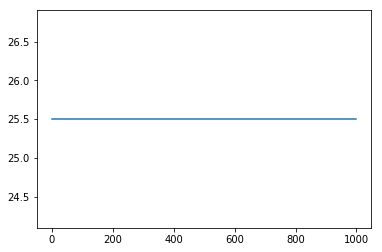

In [14]:
plt.plot(E)


# NN1 - Show independent, dependent, predicted values

In [15]:
a_o = NN1.feedforward(X)
print(np.concatenate((X,y,a_o),axis=0))

ValueError: all the input arrays must have same number of dimensions